In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:,[1,2,3]].values
y = dataset.iloc[:, -1].values
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])

In [4]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [6]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [7]:
metrics.confusion_matrix(y_test,y_pred)

array([[48,  4],
       [ 8, 20]], dtype=int64)

In [8]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print('Precision',metrics.precision_score(y_test,y_pred))
print('Recall',metrics.recall_score(y_test,y_pred))

Accuracy 0.85
Precision 0.8333333333333334
Recall 0.7142857142857143


In [9]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[48,  4],
       [ 8, 20]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

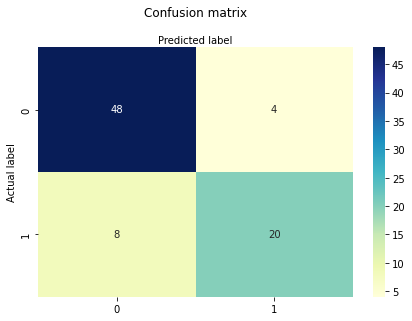

In [10]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print('F1 Score:',2*((metrics.precision_score(y_test,y_pred)*metrics.recall_score(y_test,y_pred))/(metrics.precision_score(y_test,y_pred)+metrics.recall_score(y_test,y_pred))))

F1 Score: 0.7692307692307692
